# Calculate returns

In [1]:
import numpy as np
price = np.array([8.70, 8.91, 8.71])
price[1:]/price[:-1] - 1

array([ 0.02413793, -0.02244669])

In [2]:
import pandas as pd
prices = pd.DataFrame({"BLUE": [8.70, 8.91, 8.71, 8.43, 8.73], "RED": [10.66, 11.08, 10.71, 11.59, 12.11]})

# calculate returns
prices.iloc[1:].values / prices.iloc[:-1] - 1
# OR print(prices.iloc[1:] / prices.iloc[:-1].values - 1)

,BLUE,RED
0,0.024138,0.039400
1,-0.022447,-0.033394
2,-0.032147,0.082166
3,0.035587,0.044866


In [3]:
prices/prices.shift(1)

,BLUE,RED
0,NaN,NaN
1,1.024138,1.039400
2,0.977553,0.966606
3,0.967853,1.082166
4,1.035587,1.044866


In [4]:
prices.pct_change()

,BLUE,RED
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [5]:
import matplotlib.pyplot as plt
prices.plot()

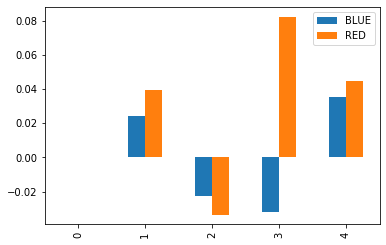

In [6]:
returns = prices.pct_change()
returns.plot.bar()

In [7]:
# annualising returns
np.prod(returns + 1) - 1
# or (returns+1).prod() - 1

BLUE    0.003448
RED     0.136023
dtype: float64

In [8]:
# volatility
returns.std()

BLUE    0.033565
RED     0.048328
dtype: float64

In [9]:
# annualise volatility
returns.std() * np.sqrt(4)

BLUE    0.067130
RED     0.096657
dtype: float64

In [10]:
returns = pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv", header = 0, index_col = 0, parse_dates = True, na_values = -99.99)
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [11]:
columns = ['Lo 10', "Hi 10"]
returns = returns[columns] / 100
returns.columns = ["SmallCap", "LargeCap"]
returns.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


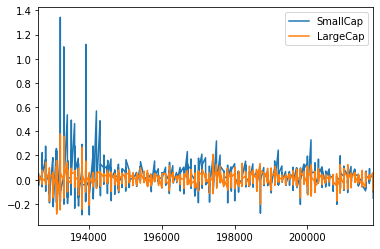

In [12]:
returns.plot.line()

In [13]:
# volatility
volatility = returns.std()
annualised_vol = volatility * np.sqrt(12)
annualised_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [14]:
returns.shape

(1110, 2)

In [15]:
# return
n_months = returns.shape[0]
return_per_month = (returns + 1).prod() ** (1/n_months) -1
annualised_return = (return_per_month + 1)**12 - 1
annualised_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [16]:
annualised_return = (returns + 1).prod() ** (12/n_months) -1
annualised_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [17]:
# sharpe ratio
riskfree_rate = 0.03
excess_return = annualised_return - riskfree_rate
sharpe_ratio = excess_return / annualised_vol
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64

In [18]:
# convert index to time-series
returns.index = pd.to_datetime(returns.index, format = "%Y%m")
returns.head()

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [19]:
returns.index = returns.index.to_period('M')
returns.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [34]:
def drawdown(return_series: pd.Series):
    """
    Take a time series of asset returns
    Computes and returns a DataFrame that contains:
    the wealth index; the previous peaks; the percent drawdowns
    """
    wealth_index = 1000 * (1 + return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdown = (wealth_index - previous_peaks) / previous_peaks
    return pd.DataFrame({
        "Wealth": wealth_index, 
        "Peaks": previous_peaks,
        "Drawdowns": drawdown})
        
drawdown(returns["LargeCap"]).head()

,Wealth,Peaks,Drawdowns
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


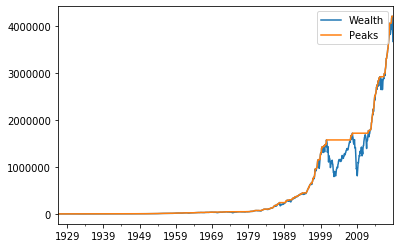

In [44]:
drawdown(returns["LargeCap"])[["Wealth", "Peaks"]].plot()

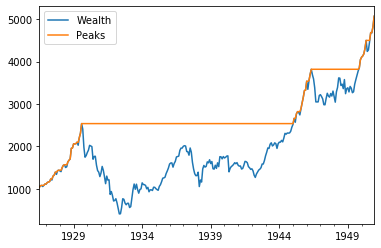

In [46]:
drawdown(returns[:"1950"]["LargeCap"])[["Wealth", "Peaks"]].plot()

In [48]:
drawdown(returns["LargeCap"])["Drawdowns"].min()

-0.8400375277943123

In [49]:
drawdown(returns["SmallCap"])["Drawdowns"].min()

-0.8330007793945303

In [50]:
drawdown(returns["LargeCap"])["Drawdowns"].idxmin()

Period('1932-05', 'M')

In [51]:
drawdown(returns["SmallCap"])["Drawdowns"].idxmin()
# conclusion: both largecap and small cap have similar drawdowns

Period('1932-05', 'M')